In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
    # #2 Logistic Regression

In [3]:
# GPA, GRE scores dataset

X=np.array([
[1,1.0,1.0],
[1,0.9,1.0],
[1,0.9,0.875],
[1,0.7,0.75],
[1,0.6,0.875],
[1,0.6,0.875],
[1,0.5,0.75],
[1,0.5,0.8125],
[1,0.5,1.0],
[1,0.5,0.875],
[1,0.5,0.875]])

y=np.array([[
1,
1,
1,
-1,
-1,
1,
-1,
-1,
1,
-1,
1
]]).T;


In [4]:
X.shape

(11, 3)

In [20]:
w = np.ones((1,X.shape[1]))
#TODO
def error(x,y,w):
      
    ln = np.log(1 + (np.exp(-(y)*(x@w.T))))

    return ln

#TODO
def error_mean(X,y,w):
    l = error(X,y,w)
    m = np.mean(l)
    return m

print(error_mean(X,y,w))

1.1564462905916348


In [23]:
#TODO
def grad(x,y,w):
    
    fn = ((y)*(x))/(1+np.exp((y)*(x@w.T)))
  
    return fn

#TODO
def grad_mean(X,y,w):
    f = -(grad(X,y,w)).mean(0)
    return f

print(grad_mean(X,y,w))

[0.37959402 0.20802755 0.30424018]


[[-1.98019655  2.00560449  1.0649168 ]]


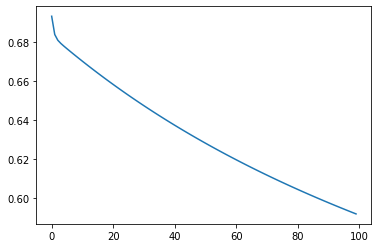

In [7]:
def fit(X,y,kappa,iter):
    w = np.zeros((1,X.shape[1]))
    E = []

    #TODO  
    for i in range(iter):
        E.append(error_mean(X,y,w))
        w += -(grad_mean(X,y,w))*(kappa)
    return w,E

w,E = fit(X,y,1,100)
print(w)
plt.plot(E)
plt.show()

In [8]:
    # #3 Logistic Regression

In [9]:
import pandas as pd

data = pd.read_csv('ex3data.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [10]:
# we use .values to obtain the underlying numpy array of the dataframe
# we use iloc in order to access parts of the dataframe by using ranges; -1 is the last column
X = data.iloc[:,0:-1].values

# we normalize X
maxX = np.max(X, axis=0)
minX = np.min(X, axis=0)
X = (X-minX)/(maxX-minX)
#print( X )


# we insert an all-ones column at index 0
X = np.insert(X, 0, 1, axis=1)

#print(X)

y = data.iloc[:,-1:].values 


# we build a boolean index
where_are_zeros = (y==0)
y[where_are_zeros] = -1

#print(y)

# uncomment the above printouts to see what's going one

In [11]:
def prepare(data):
    X = data.iloc[:,0:-1].values

    # we normalize X
    maxX = np.max(X, axis=0)
    minX = np.min(X, axis=0)
    X = (X-minX)/(maxX-minX)

    # we insert an all-ones column at index 0
    X = np.insert(X, 0, 1, axis=1)

    y = data.iloc[:,-1:].values 

    where_are_zeros = (y==0)
    y[where_are_zeros] = -1
    
    return X,y


X,y = prepare(data)
#print(X)
#print(y)

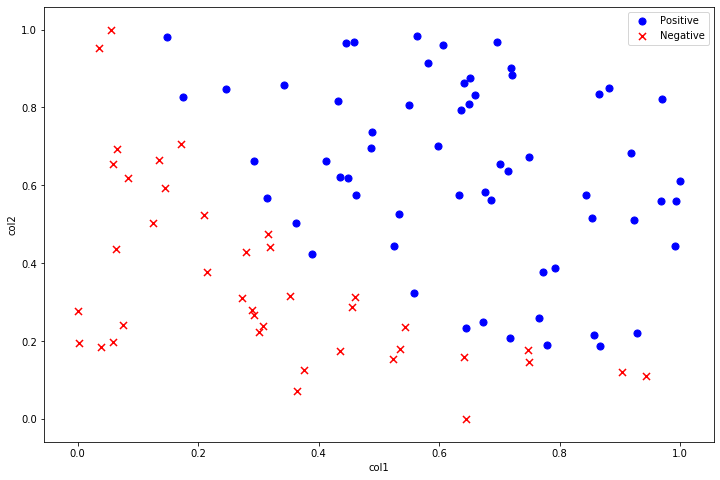

In [12]:
def visualize(X, y, col1=1, col2=2):
    positive_indexes = np.where(y == 1)[0]  #only the first element of the result is needed, i.e. we do [0]
    negative_indexes = np.where(y == -1)[0]

    positive = X[positive_indexes]  # positive rows
    negative = X[negative_indexes]  # negative rows

    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(positive[:,1:2], positive[:,2:], s=50, c='b', marker='o', label='Positive')
    ax.scatter(negative[:,1:2], negative[:,2:], s=50, c='r', marker='x', label='Negative')
    ax.legend()
    ax.set_xlabel('col' + str(col1))
    ax.set_ylabel('col' + str(col2))

    plt.show()
    

visualize(X,y)

[[-8.18922472  9.35074421  8.77019163]]


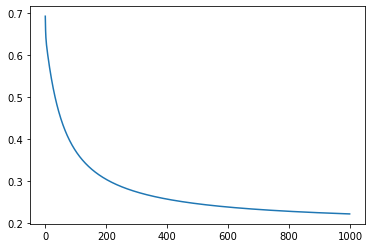

In [13]:
w,E = fit(X,y,1,1000)
print(w)
plt.plot(E)
plt.show()

# We should get a decreasing curve

In [14]:
#TODO
def predict(w, X):
    
    fn = 1/(1+np.exp(-(X@w.T)))
    y_prd=np.zeros(y.shape)
    for i in range(X.shape[0]):
        if fn[i]>0.5:
            y_prd[i]=1
        else :
            y_prd[i]=-1

    return y_prd

#TODO
def accuracy(y,y_pred):
    count = 0
    for i in range(len(y)):
        if y[i]==y_pred[i]:
            count += 1
    acc = count/y.shape[0]
    return acc

y_pred = predict(w,X)
print( accuracy(y,y_pred) )

0.89


In [15]:
def split_train_test(X,y,pct=80):
    n = X.shape[0]
    s = round(n * pct / 100)
    
    indices = np.random.permutation(n)
    train_idx, test_idx = indices[:s], indices[s:]
    
    X_train, X_test = X[train_idx,:], X[test_idx,:]
    y_train, y_test = y[train_idx,:], y[test_idx,:]
    
    return X_train, y_train, X_test, y_test

[[-8.3853852   9.1624022   8.97790621]]


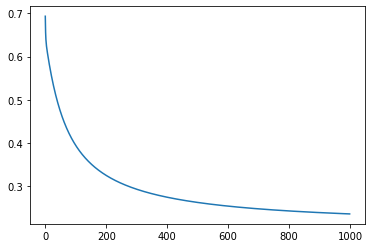

0.9


In [16]:
X_train, y_train, X_test, y_test = split_train_test(X,y,pct=80)
w,E = fit(X_train,y_train,1,1000)
print(w)
plt.plot(E)
plt.show()
y_pred = predict(w,X_test)
print( accuracy(y_test,y_pred) )